In [1]:
from os.path import join, splitext, basename
import geopandas as gpd
from shapely.ops import transform
from glob import glob
import leafmap.foliumap as leafmap
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
save_dir = "../regions/shapes/"
os.makedirs(save_dir, exist_ok=True)

In [3]:
shapefile_path="/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/shapefiles/india_districtwise_shapefile_2022/DISTRICT_BOUNDARY.shp"

df = gpd.read_file(shapefile_path).to_crs(epsg=4326)
df['District'] = df['District'].str.replace('>', 'A')
df['STATE'] = df['STATE'].str.replace('>', 'A')
df['District'] = df['District'].str.replace('|', 'I')
display(df.head())

,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
0,MORBI,GUJARAT,None,24,673,539476.764723,4.791280e+09,"POLYGON ((71.1172 23.21252, 71.11778 23.21247,..."
1,AHMADABAD,GUJARAT,None,24,438,857254.094647,6.966374e+09,"POLYGON ((71.97206 23.05747, 71.97204 23.05749..."
2,ANAND,GUJARAT,None,24,440,393046.690523,3.054307e+09,"POLYGON ((73.02614 22.73478, 73.02693 22.73474..."
3,DEVBHUMI DWARKA,GUJARAT,None,24,674,661732.986530,4.002784e+09,"MULTIPOLYGON (((69.33941 22.38597, 69.33976 22..."
4,JAMNAGAR,GUJARAT,None,24,447,737428.071884,5.694271e+09,"MULTIPOLYGON (((70.5365 22.40753, 70.53635 22...."


In [4]:
bharatpur=df[df['District']=='BHARATPUR']
bharatpur

,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
63,BHARATPUR,RAJASTHAN,None,8,91,731664.143421,4.881166e+09,"MULTIPOLYGON (((77.07565 27.27704, 77.07819 27..."


In [5]:
bharatpur['district']='bharatpur'   
bharatpur=bharatpur[['district','geometry']]
bharatpur


,district,geometry
63,bharatpur,"MULTIPOLYGON (((77.07565 27.27704, 77.07819 27..."


In [6]:
bharatpur.to_file(join(save_dir,"bharatpur.geojson"), driver='GeoJSON')
print("Saved to file")

Saved to file


In [7]:
m = leafmap.Map()
m.add_basemap("HYBRID")
m.add_gdf(bharatpur, layer_name="Alwar")
display(m)

In [13]:
## print all up districts which comes underncr region
ncr_districts = ['ALWAR','BHARATPUR']
ncr_df = df[df['District'].isin(ncr_districts)]
display(len(ncr_df))

2

<Axes: >

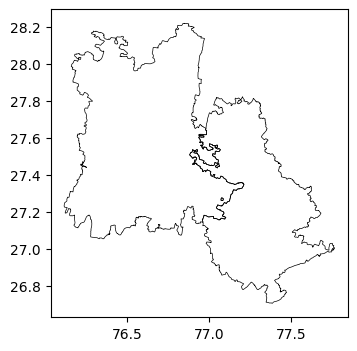

In [14]:
fig, ax = plt.subplots(figsize=(4, 4))
ncr_df.plot(ax=ax, color="none", edgecolor="black", linewidth=0.5)

In [15]:
m = leafmap.Map()
m.add_basemap("HYBRID")
m.add_gdf(ncr_df, layer_name="NCR Districts")
display(m)

In [17]:
ncr_df['District']='ALWAR'
ncr_df

,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
20,ALWAR,RAJASTHAN,None,8,87,908983.518749,8.091212e+09,"POLYGON ((76.85108 28.22115, 76.85219 28.22098..."
63,ALWAR,RAJASTHAN,None,8,91,731664.143421,4.881166e+09,"MULTIPOLYGON (((77.07565 27.27704, 77.07819 27..."
